 MAE (Mean Absolute Error): 20.24
 RMSE (Root Mean Squared Error): 23.82


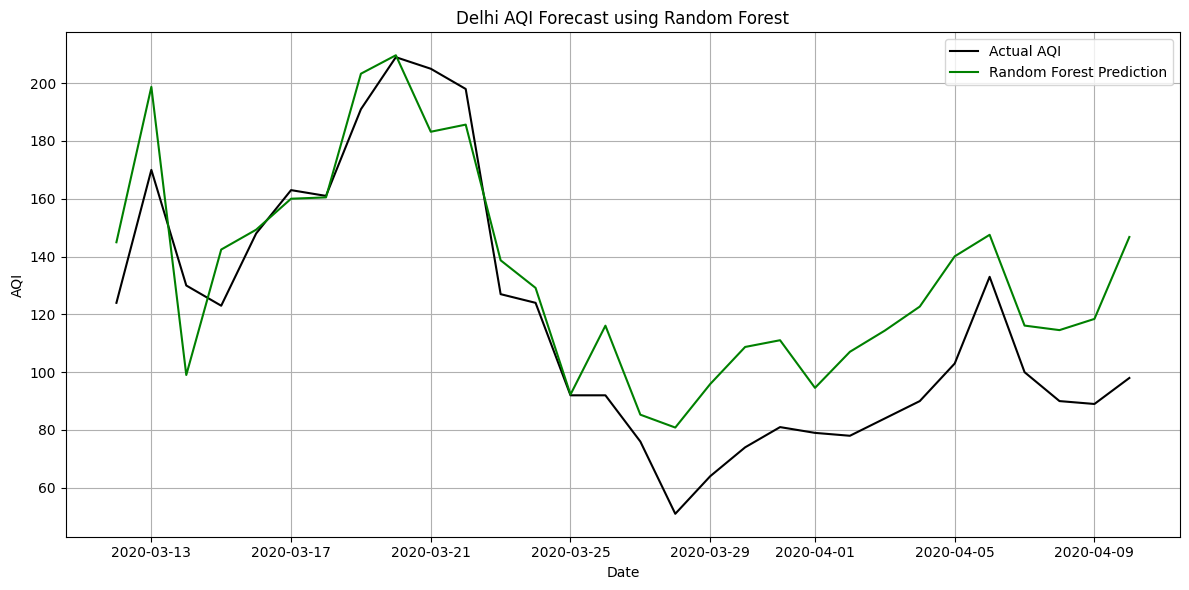

In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 2: Load the CSV from /content/
df = pd.read_csv("/content/city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Filter for Delhi and select columns
df = df[df['City'] == 'Delhi'].sort_values('Date')
df = df[['Date', 'AQI', 'PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']]

# Step 4: Fill missing values
df.interpolate(method='linear', inplace=True)
df.dropna(inplace=True)

# Step 5: Add time-based features
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Step 6: Define features and target
features = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'day', 'month', 'year']
target = 'AQI'

train_df = df.iloc[:-30]
test_df = df.iloc[-30:]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Step 8: Train the model
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Step 9: Predict and evaluate
predictions = rf.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f" MAE (Mean Absolute Error): {mae:.2f}")
print(f" RMSE (Root Mean Squared Error): {rmse:.2f}")

# Step 10: Plot predictions
plt.figure(figsize=(12,6))
plt.plot(test_df['Date'], y_test.values, label='Actual AQI', color='black')
plt.plot(test_df['Date'], predictions, label='Random Forest Prediction', color='green')
plt.title('Delhi AQI Forecast using Random Forest')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
!pip install tensorflow pandas matplotlib scikit-learn --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 45.4 MB/s eta 0:00:00


Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0326
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0105
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0096
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0089
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0075
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0076
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0064
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0061
Epoch 9/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0054
Epoch 10/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0059
Epoch 11/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0055
Epoch 12/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0051
Epoch 13/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0054
Epoch 14/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0054
Epoch 15/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s

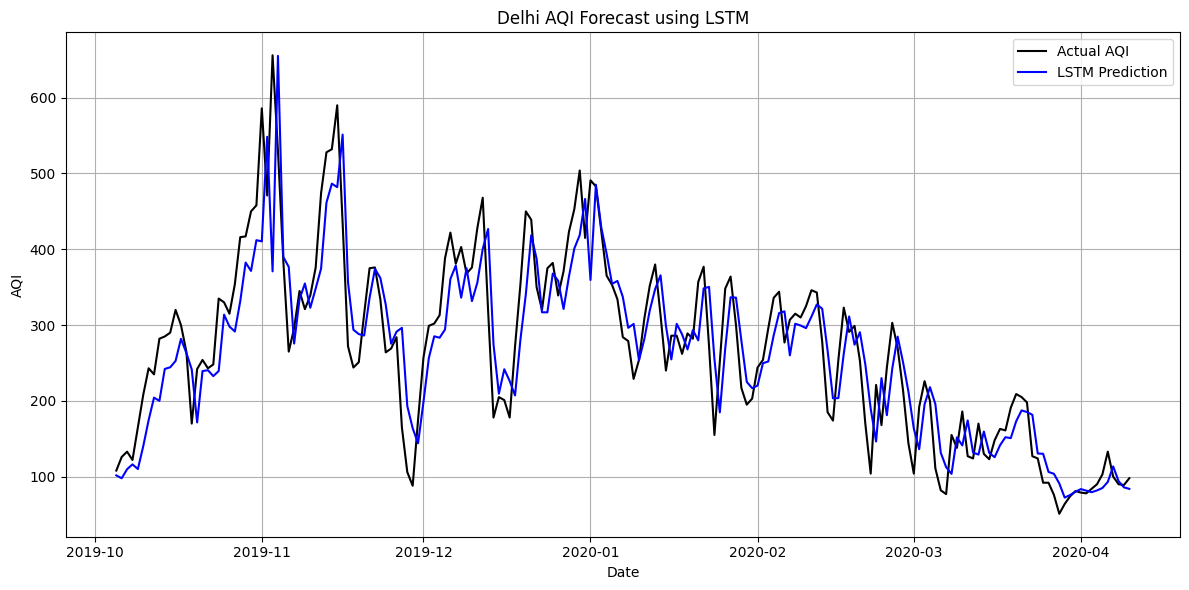

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
df = pd.read_csv("/content/city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['City'] == 'Delhi'].sort_values('Date')

# Use only AQI for univariate LSTM
data = df[['Date', 'AQI']].dropna()
data['AQI'] = data['AQI'].interpolate()
data.dropna(inplace=True)

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['AQI'].values.reshape(-1,1))

# Sequence creation
sequence_length = 30
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # [samples, timesteps, features]

# Split into train/test
split = int(0.9 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# Predict
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
mae = mean_absolute_error(y_test_actual, predicted)
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted))
print(f"✅ LSTM MAE: {mae:.2f}")
print(f"✅ LSTM RMSE: {rmse:.2f}")

# Plot
dates = data['Date'].values[-len(y_test):]
plt.figure(figsize=(12,6))
plt.plot(dates, y_test_actual, label='Actual AQI', color='black')
plt.plot(dates, predicted, label='LSTM Prediction', color='blue')
plt.title("Delhi AQI Forecast using LSTM")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
